# Markets and More Portfolio Optimization

### BUSI 721: Data-Driven Finance I
### Kerry Back, Rice University

### Outline

1. How markets work (and why your broker doesn't need to charge commissions)
2. Stocks, bonds, and gold over a longer horizon
3. Optimal portfolios without short sales

## 1. Markets

### Limit orders versus market orders

- Market order (usual order) is an order to trade at the market price.  It will always execute.
- A limit order is an order to trade at a specified (limit) price or better.
  - E.g., buy at $50 or less
  - E.g., sell at $50 or more
- A marketable limit order is a limit order that can be executed immediately, because its limit price is available in the market.
- In general, limit orders may or may not execute.

### Limit order books

- Each exchange keeps a book of limit orders
- Orders to buy are called bids
- Orders to sell are called offers
- Incoming market orders are executed against the best available limit order
  - A market buy order executes against the lowest priced offer
  - A market sell order executes against the highest priced bid
- The lowest price offer and highest price bid are called the best bid and offer or the inside quotes.

### Bid-ask spread

- Offer prices are also called ask prices.
- The inside quotes can be called the best bid and ask.
- The difference between the best ask and the best bid is called the bid-ask spread.
- Some traders post bids and offers to earn the spread rather than to trade.
  - They try to make round trips to keep inventories low.
  - Called market makers or dealer.
  - Nowadays high frequency traders (fast machines and connections and trade via algorithms).

### Nasdaq best bid and offer

[CVX bid and offer](https://www.nasdaq.com/market-activity/stocks/cvx/real-time)

### NMS (National Market System)

- Reg NMS requires your broker to execute your order at the exchange (or non-exchange venue) that provides the best price.
- The national best bid and offer are called the NBBO.
- Reg NMS requires execution at the NBBO.

### U.S. stock exchanges

- NYSE
- NYSE Mkt
- NYSE Arca
- Nasdaq
- Nasdaq Boston
- Nasdaq Philadelphia
- BATS (owned by Chicago Board Options Exchange=CBOE)
- IEX

### Non-exchange trading venues

- Trades can be executed outside of exchanges provided the execution is at the NBBO or better.
- Institutions like Citadel fill orders to earn the spread.
- To get orders, they kick back part of the spread to brokers (payment for order flow).

### Make or take fees

- Exchanges have make or take fees
  - Limit order = make liquidity
  - Market order = take liquidity
- Some exchanges pay limit orders and charge market orders
- Other exchanges pay market orders and charge limit orders
- In general, a means of attracting order flow.  
- Fees are limited by the SEC to no more than 3/10 of a penny per share.

### Broker order routing

- [Schwab](https://www.schwab.com/legal/order-routing-1){target="_blank"}
- [e-Trade](https://us.etrade.com/l/quarterly-order-routing-report){target="_blank"}
- [Interactive Brokers](https://www.interactivebrokers.com/download/1Q_2019_IB_ORDER_ROUTING_REPORT.pdf){target="_blank"}

### Chairman of the SEC on order routing

[Gary Gensler on YouTube](https://www.youtube.com/embed/2HSWM3fKldY)

## 2. Stocks, bonds, and gold

- IEF, SPY, and GLD history is not long enough, especially for estimating expected returns
  - IEF returns as illustration
- Can use stock and bond indices over longer time period
  - Data from Aswath Damodoran (NYU)
- Stock and bond correlation was > 0 in 20th century, < 0 in 21st century
  - What does the future hold?

### IEF returns

[*********************100%%**********************]  1 of 1 completed


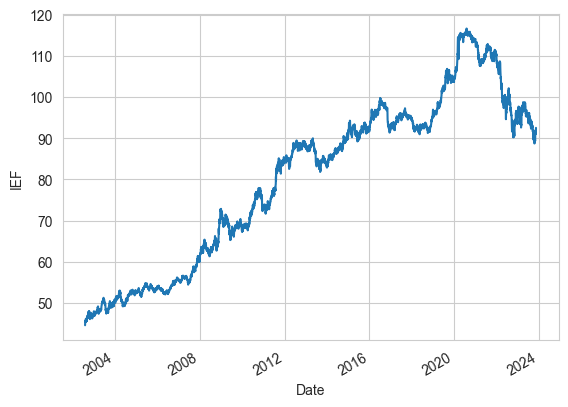

In [41]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

price = yf.download("IEF", start=1990)["Adj Close"]
price.plot()
plt.ylabel("IEF")
plt.show()

## 20-year Treasury means from Damodoran's data

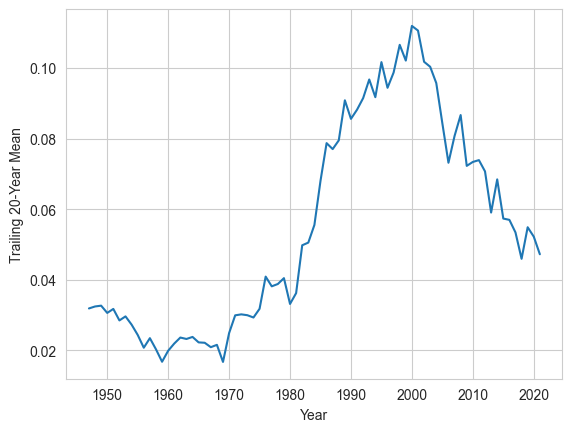

In [42]:
import pandas as pd
df = pd.read_csv(
    'https://www.dropbox.com/s/hgwte6swx57jqcv/nominal_sbb.csv?dl=1',
    index_col="Year" 
)

means = df.Treasuries.rolling(20).mean()
means.plot()   
plt.ylabel("Trailing 20-Year Mean")
plt.show()           

In [43]:
df.head()

,S&P 500,TBills,Treasuries,Corporates
Year,,,,
1928,0.438112,0.0308,0.008355,0.032196
1929,-0.082979,0.0316,0.042038,0.030179
1930,-0.251236,0.0455,0.045409,0.005398
1931,-0.438375,0.0231,-0.025589,-0.156808
1932,-0.086424,0.0107,0.087903,0.235896


### 40-year means

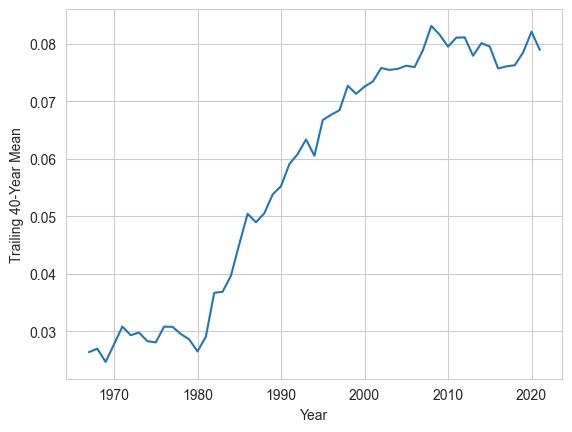

In [44]:
means = df.Treasuries.rolling(40).mean()
means.plot()   
plt.ylabel("Trailing 40-Year Mean")
plt.show() 

### 20-Year Stock and Bond Correlations

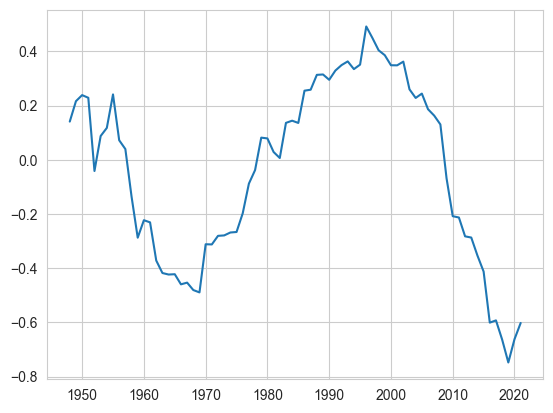

In [45]:
corrs = []
for i in range(20, len(df.index)):
    corr = df.iloc[(i-20):i]["S&P 500"].corr(df.Treasuries)
    corrs.append(corr)

plt.plot(df.index[20:], corrs)

## 3. Optimal portfolios without short sales

### Example

In [46]:
import numpy as np 

rf = 0.03
mu = [0.04, 0.10, 0.10]
stdevs = [0.2, 0.2, 0.2]
corrs = [
    [1., 0., 0.8],
    [0., 1., 0.3],
    [0.8, 0.3, 1.] 
]
Sigma = np.diag(stdevs) @ corrs @ np.diag(stdevs)

### Define arrays

In [47]:
# example target expected return
r = 0.08

P = Sigma
q = np.zeros(3).reshape(3, 1)
A = (mu - rf*np.ones(3)).reshape(1, 3)
b = np.array([r-rf]).reshape(1, 1)

### Compute the efficient portfolio (with short sales)

In [48]:
from cvxopt import matrix
from cvxopt.solvers import qp

sol = qp(
    P=matrix(P),
    q=matrix(q),
    A=matrix(A),
    b=matrix(b)
)
pd.Series(sol["x"], index=range(1, 4)).round(3)

1   -0.497
2    0.109
3    0.676
dtype: float64

### Compute the efficient portfolio (without short sales)

In [49]:
G = -np.identity(3)
h = np.zeros((3, 1))

sol = qp(
    P=matrix(P),
    q=matrix(q),
    G=matrix(G),
    h=matrix(h),
    A=matrix(A),
    b=matrix(b)
)
pd.Series(sol["x"], index=range(1, 4)).round(3)

     pcost       dcost       gap    pres   dres
 0:  7.0157e-03 -7.5505e-01  8e-01  0e+00  2e+00
 1:  7.0089e-03 -1.4634e-03  8e-03  8e-17  3e-02
 2:  6.7723e-03  6.5362e-03  2e-04  1e-17  3e-04
 3:  6.6347e-03  6.6316e-03  3e-06  8e-17  4e-06
 4:  6.6327e-03  6.6326e-03  3e-08  8e-17  4e-08
Optimal solution found.


1    0.000
2    0.357
3    0.357
dtype: float64